Test accuracy: 89.44%
              precision    recall  f1-score   support

        mild       0.93      0.76      0.84        51
    moderate       0.87      0.98      0.92        61
      severe       0.90      0.92      0.91        49

    accuracy                           0.89       161
   macro avg       0.90      0.89      0.89       161
weighted avg       0.90      0.89      0.89       161



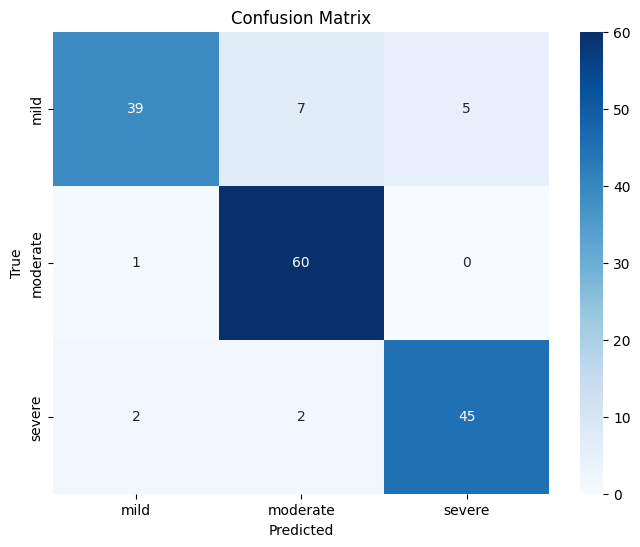

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set paths to the directories containing the images
base_dir = 'labeled_data'  # Replace with your dataset path
categories = ['mild', 'moderate', 'severe']

# Image properties
img_height = 150
img_width = 150

# Function to load and preprocess images
def load_images(base_dir, categories, img_height, img_width):
    data = []
    labels = []

    for category in categories:
        category_path = os.path.join(base_dir, category)
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_width, img_height))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = img.flatten()  # Flatten to 1D array
            data.append(img)
            labels.append(category)

    return np.array(data), np.array(labels)

# Load the dataset
data, labels = load_images(base_dir, categories, img_height, img_width)

# Normalize pixel values and encode labels
data = data / 255.0

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Train an SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can try 'linear' kernel too
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=label_encoder.classes_, index=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
